In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.constants import micro, nano, milli




## interference signal from a grating that is moving laterally

https://physics.stackexchange.com/questions/470315/how-to-derive-the-intensity-formula-of-a-diffraction-grating

https://labs.phys.utk.edu/mbreinig/phys421/modules/m6/Slit%20interference.html




C:\Users\daguiam264\AppData\Local\Temp\ipykernel_24424\93592514.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, np.sin(x)/x)


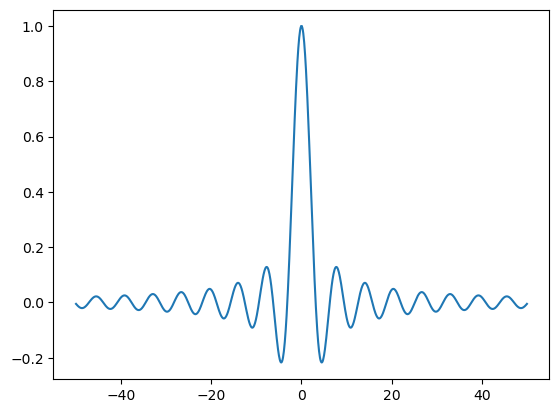

In [3]:
x = np.linspace(-50,50,1001)
plt.plot(x, np.sin(x)/x)

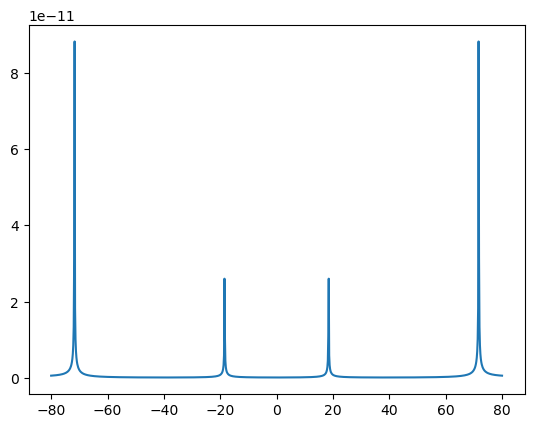

In [ ]:

# pitch of the diffraction grating
grating_pitch = 2*micro

# aperture of the grating opening
grating_aperture = 1*micro # 

# assumes the grating is high contrast absorbing

wavelength = 633*nano
wavenumber = 2*np.pi/wavelength


diffraction_order = 1

theta_order = np.arcsin(diffraction_order*wavelength/grating_pitch)

# E field amplitude
E0 = 1

# number of gratings illuminated by a plane wave
N = 0

# lateral displacement



x_displacement = np.array([0, 100])*nano

angle_range = np.linspace(-80, 80, 1000)

theta_range = np.radians(angle_range)



xd = x_displacement[0]
E_theta = E0 *( 
            (np.sin( (N+1/2)*grating_pitch* np.sin(theta_range))  / (np.sin(1/2*wavenumber*grating_pitch * np.sin(theta_range)))) *
            (2*(grating_aperture/2)*np.sin(wavenumber*(grating_aperture/2)*np.sin(theta_range) )/ (wavenumber*(grating_aperture/2)* np.sin(theta_range))) *
             np.exp(1j*(wavenumber*xd)*np.sin(theta_range))
            )


plt.plot(angle_range, np.abs(E_theta))

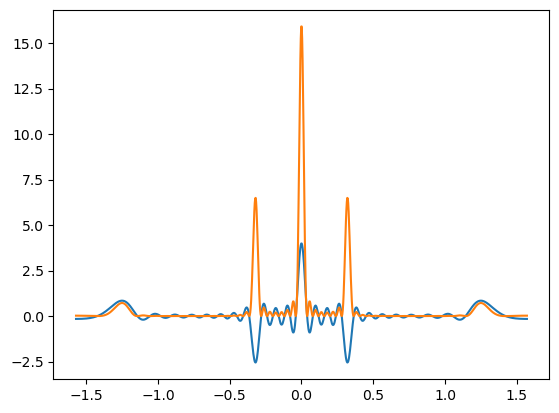

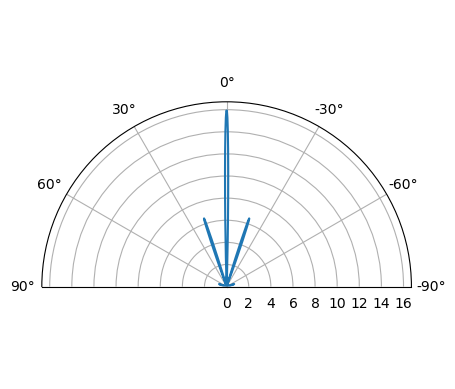

In [37]:

# pitch of the diffraction grating
grating_pitch = 2*micro

# aperture of the grating opening
grating_aperture = grating_pitch/2

# assumes the grating is high contrast absorbing

wavelength = 633*nano
# wavelength = 10*micro
wavenumber = 2*np.pi/wavelength


diffraction_order = 1

theta_order = np.arcsin(diffraction_order*wavelength/grating_pitch)

# E field amplitude
E0 = 1

# number of gratings illuminated by a plane wave
N = 5

# lateral displacement
x_displacement = np.array([0, 100])*nano

angle_range = np.linspace(-90, 90, 1000)

theta_range = np.radians(angle_range)

sin_angle = np.sin(theta_range)


theta = theta_range

single_slit_amplitude = np.sin(np.pi*grating_aperture/wavelength*np.sin(theta))/(np.pi*grating_aperture/wavelength*np.sin(theta))

#multiple_slit_amplitude

multiple_slit_amplitude = sum([np.cos((n-1/2)*2*np.pi/wavelength*grating_pitch*np.sin(theta)) for n in range(1, N)])


E_field = E0 * single_slit_amplitude * multiple_slit_amplitude

intensity = np.power(np.abs(E_field),2)

plt.plot(theta, E_field)
plt.plot(theta, intensity)


plt.figure()
plt.polar(theta, intensity)





In [44]:

def calculate_E_field_amplitude_grating(grating_pitch, grating_aperture, N_gratings, theta, wavelength, E0=1,):
    """
    Calculates the electric field of an incident wave on a grating
    """
            

    # diffraction_order = 1

    # theta_order = np.arcsin(diffraction_order*wavelength/grating_pitch)


    # number of gratings illuminated by a plane wave
    N = N_gratings



    single_slit_amplitude = np.sin(np.pi*grating_aperture/wavelength*np.sin(theta))/(np.pi*grating_aperture/wavelength*np.sin(theta))

    #multiple_slit_amplitude

    multiple_slit_amplitude = sum([np.cos((n-1/2)*2*np.pi/wavelength*grating_pitch*np.sin(theta)) for n in range(1, N)])


    E_field = E0 * single_slit_amplitude * multiple_slit_amplitude

    return E_field


def calculate_angle_order(grating_pitch, wavelength, order):

    return np.arcsin(order*wavelength/grating_pitch)

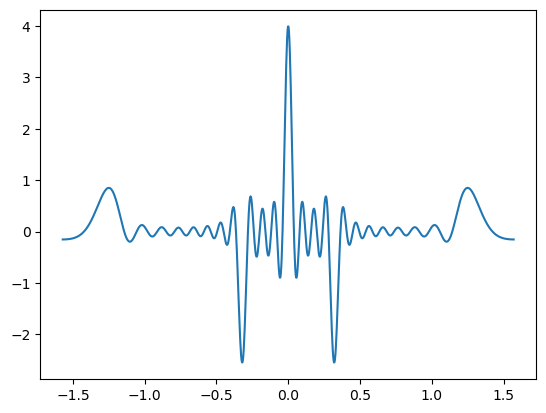

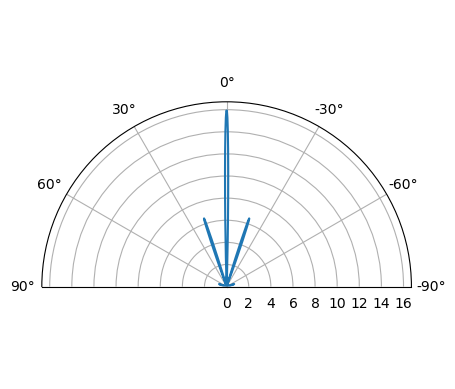

In [43]:

# pitch of the diffraction grating
grating_pitch = 2*micro

# aperture of the grating opening
grating_aperture = grating_pitch/2

# assumes the grating is high contrast absorbing

wavelength = 633*nano
# wavelength = 10*micro
wavenumber = 2*np.pi/wavelength


angle_range = np.linspace(-90, 90, 1000)

theta_range = np.radians(angle_range)

# sin_angle = np.sin(theta_range)

theta = theta_range

N_gratings = 5

E_field_grating = calculate_E_field_amplitude_grating(grating_pitch, grating_aperture, N_gratings, theta, wavelength, E0=1,)
intensity = np.power(np.abs(E_field_grating),2)

E_field 


plt.plot(theta, E_field_grating)


plt.figure()
plt.polar(theta, intensity)



ax = plt.gca()
ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_theta_zero_location("N")





18.451391195825426


Text(0, 0.5, 'Amplitude [a.u.]')

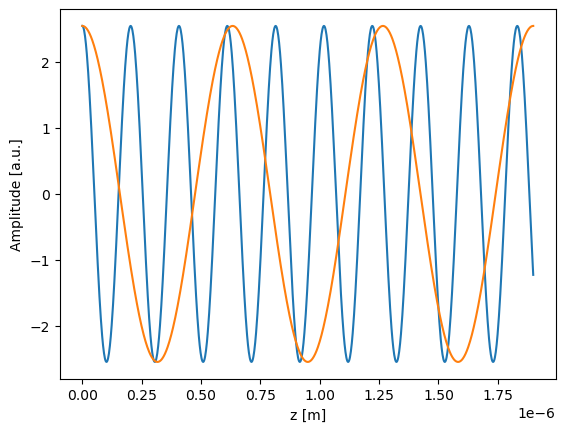

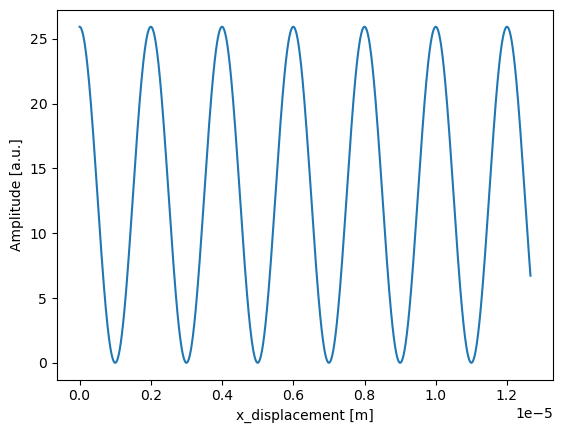

In [65]:
order = 1

z = np.linspace(0, 3, 1000)*wavelength

x_displacement = np.linspace(0, 20, 1000)*wavelength


xd = np.array([0, 50, 100])*nano

theta_order = calculate_angle_order(grating_pitch, wavelength, order)
print(np.degrees(theta_order))



E_field_grating_amplitude = calculate_E_field_amplitude_grating(grating_pitch, grating_aperture, N_gratings, theta_order, wavelength, E0=1,)
E_field_grating_amplitude = np.abs(E_field_grating_amplitude)


# Plot along z
E_field_grating = E_field_grating_amplitude* np.exp(1j*(wavenumber*(z+ x_displacement*np.sin(theta_order))))


E_reference = 1*E_field_grating_amplitude
E_field_reference = E_reference*np.exp(1j*(wavenumber*z))

plt.plot(z, E_field_grating)
plt.plot(z, E_field_reference)

plt.xlabel("z [m]")
plt.ylabel("Amplitude [a.u.]")


z = 0

E_field_reference = E_reference*np.exp(1j*(wavenumber*z))


E_field_grating = E_field_grating_amplitude* np.exp(1j*(wavenumber*(z+ x_displacement*np.sin(theta_order))))


E_field_total = E_field_reference + E_field_grating


intensity_total = np.power(np.abs(E_field_total),2)

plt.figure()
plt.plot(x_displacement, intensity_total)


plt.xlabel("x_displacement [m]")
plt.ylabel("Amplitude [a.u.]")
# for x in xd:
    
#     E_field_grating = E_field_grating_amplitude* np.exp(1j*(wavenumber*(z+ x*np.sin(theta_order))))

#     E_field_total = E_field_reference + E_field_grating


#     intensity_total = np.power(np.abs(E_field_total),2)
#     plt.plot(z, intensity_total)


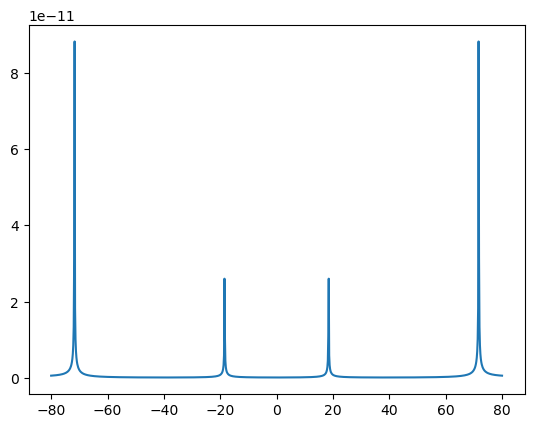

In [ ]:

# pitch of the diffraction grating
grating_pitch = 2*micro

# aperture of the grating opening
grating_aperture = 1*micro # 

# assumes the grating is high contrast absorbing

wavelength = 633*nano
wavenumber = 2*np.pi/wavelength


diffraction_order = 1

theta_order = np.arcsin(diffraction_order*wavelength/grating_pitch)

# E field amplitude
E0 = 1

# number of gratings illuminated by a plane wave
N = 0

# lateral displacement



x_displacement = np.array([0, 100])*nano

angle_range = np.linspace(-80, 80, 1000)

theta_range = np.radians(angle_range)



xd = x_displacement[0]
E_theta = E0 *( 
            (np.sin( (N+1/2)*grating_pitch* np.sin(theta_range))  / (np.sin(1/2*wavenumber*grating_pitch * np.sin(theta_range)))) *
            (2*(grating_aperture/2)*np.sin(wavenumber*(grating_aperture/2)*np.sin(theta_range) )/ (wavenumber*(grating_aperture/2)* np.sin(theta_range))) *
             np.exp(1j*(wavenumber*xd)*np.sin(theta_range))
            )


plt.plot(angle_range, np.abs(E_theta))